In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.utils import random_splits, central_point, random_coordinate, show_points

masks = os.listdir('/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask')

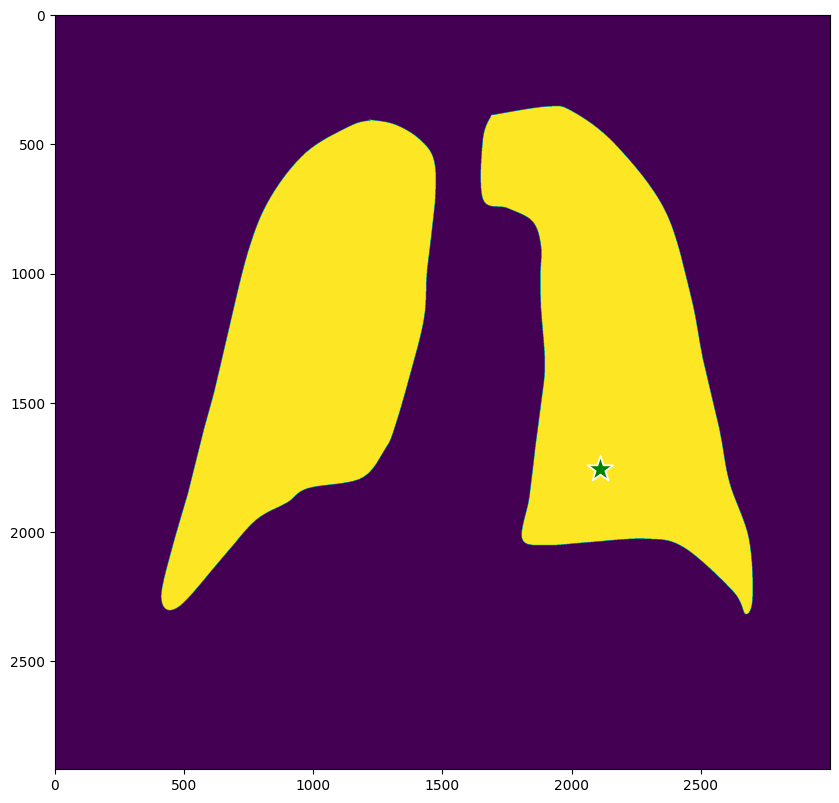

In [18]:
#mask = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0001216_segmentation.png', cv2.IMREAD_GRAYSCALE)
mask = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/CXR_kaggle/mask/CHNCXR_0001_0_mask.png', cv2.IMREAD_GRAYSCALE)

cp = central_point(mask)
rc = random_coordinate(mask)
rs = random_splits(mask, 10)

plt.figure(figsize=(10,10))
plt.imshow(mask)
show = rc
show_points(show[0], show[1], plt.gca())
plt.axis('on')
plt.show()

In [39]:
mask = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0001152_segmentation.png', cv2.IMREAD_GRAYSCALE)
contour,hier = cv2.findContours(mask,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contour:
    cv2.drawContours(mask,[cnt],0,255,-1)

# Compute the middle point along each axis
x_indices = np.where(np.sum(mask, axis=0) > 0)[0]
y_indices = np.where(np.sum(mask, axis=1) > 0)[0]
x_middle = int(np.mean(x_indices))
y_middle = int(np.mean(y_indices))

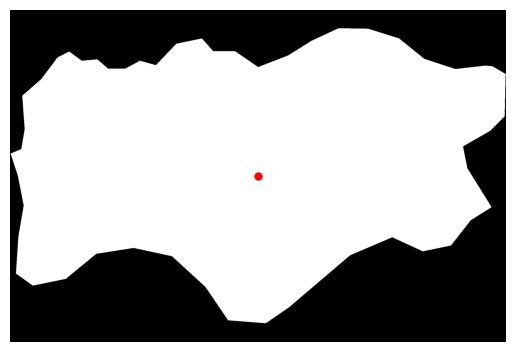

In [40]:
# Plot the mask with the middle point
fig, ax = plt.subplots()
ax.imshow(mask, cmap='gray')
ax.plot(x_middle, y_middle, 'ro', markersize=5)
ax.axis('off')
plt.show()

In [22]:
if mask[y_middle, x_middle] == 0:
    print("The middle point is outside the mask")
else:
    print("The middle point is inside the mask")

The middle point is inside the mask


In [10]:
#MIDDLE POINT

import tqdm
for mask in tqdm.tqdm(masks):
    path = os.path.join('/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask', mask)
    mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    # Compute the middle point along each axis
    x_indices = np.where(np.sum(mask, axis=0) > 0)[0]
    y_indices = np.where(np.sum(mask, axis=1) > 0)[0]
    x_middle = int(np.mean(x_indices))
    y_middle = int(np.mean(y_indices))

    # Plot the mask with the middle point

    if mask[y_middle, x_middle] == 0:
        print("The middle point is outside the mask")
        print(path)
        contour,hier = cv2.findContours(mask,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contour:
            cv2.drawContours(mask,[cnt],0,255,-1)
        if mask[y_middle, x_middle] == 0:
            print("The middle point is outside the mask AGAIN")
            print(path)
        else:
            continue
        
    else:
        continue

 14%|█▎        | 504/3692 [00:15<01:14, 42.91it/s]

The middle point is outside the mask
/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0023261_segmentation.png


 99%|█████████▉| 3669/3692 [01:49<00:00, 34.34it/s]

The middle point is outside the mask
/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0015353_segmentation.png


100%|██████████| 3692/3692 [01:50<00:00, 33.47it/s]
